# LIBRARIES

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# IMPORTING DATA 

In [2]:
data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18524\2969852544.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


# EXPLORING DATA 

In [3]:
data_raw.shape

(466285, 74)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
397141,15421220,17493554,11000,11000,11000.0,36 months,10.99,360.08,B,B2,service technition,6 years,RENT,38000.0,Source Verified,May-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,921xx,CA,13.36,0.0,Sep-03,1.0,34.0,NaN,6.0,0.0,1595,57.0,19.0,w,5336.17,5336.17,7201.6,7201.6,5663.83,1537.77,0.0,0.0,0.0,Jan-16,360.08,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.0,NaN,NaN,NaN


In [6]:
data_raw.id.nunique()

466285

In [7]:
data_raw.member_id.nunique()

466285

Terlihat bahwa tidak ada `id` atau `member_id` yang duplikat, artinya setiap baris sudah mewakili satu individu.

Selanjutnya, pembuangan fitur-fitur yang tidak berguna dilakukan. Contohnya seperti fitur yang merupakan id unik, berupa free text, nilainya kosong semua (NULL), dsb.

In [8]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [9]:
data = data_raw.drop(cols_to_drop, axis=1)

In [10]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
388228,5950,5950,5950.0,36 months,14.99,206.23,C,delivery driver,1 year,RENT,25000.0,Source Verified,May-14,Charged Off,n,debt_consolidation,Debt consolidation,NY,23.00,1.0,May-05,1.0,4.0,NaN,18.0,0.0,3956,27.1,29.0,f,0.00,0.00,1781.16,1781.16,676.21,354.94,0.0,750.01,135.0018,Nov-14,206.23,NaN,Mar-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,31211.0,13700.0
348150,11200,11200,11200.0,36 months,9.17,357.05,B,Associate Pastor Youth,< 1 year,RENT,67000.0,Source Verified,Jul-14,Fully Paid,n,credit_card,Credit card refinancing,LA,14.04,0.0,May-02,1.0,73.0,NaN,20.0,0.0,10799,45.1,30.0,w,0.00,0.00,12272.68,12272.68,11200.00,1072.68,0.0,0.00,0.0000,Oct-15,7273.98,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,685.0,99262.0,17700.0
254226,15000,15000,15000.0,36 months,6.49,459.67,A,Supervisor,1 year,MORTGAGE,73070.4,Not Verified,Nov-14,Current,n,credit_card,Credit card refinancing,FL,15.13,0.0,Jul-75,0.0,NaN,NaN,5.0,0.0,17297,93.5,14.0,f,9509.97,9509.97,6429.97,6429.97,5490.03,939.94,0.0,0.00,0.0000,Jan-16,459.67,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,334615.0,18500.0
142896,10000,10000,10000.0,36 months,18.49,363.99,D,Siegfried Rivera Lerner P.A.,9 years,RENT,39600.0,Not Verified,May-13,Charged Off,n,debt_consolidation,Consolidating Debt,FL,19.39,0.0,Jan-98,1.0,NaN,NaN,6.0,0.0,10059,75.1,12.0,f,0.00,0.00,6717.28,6717.28,3772.12,2045.42,0.0,899.74,8.9974,Sep-14,363.99,NaN,Feb-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,32762.0,13400.0
144777,10000,10000,10000.0,36 months,15.80,350.59,C,CAMINO REAL CHEVROLET,2 years,RENT,39000.0,Not Verified,Apr-13,Fully Paid,n,credit_card,Credit card refinancing,CA,22.20,0.0,Aug-08,1.0,NaN,NaN,11.0,0.0,7666,39.7,14.0,f,0.00,0.00,10260.48,10260.48,10000.00,260.48,0.0,0.00,0.0000,Jul-13,9910.89,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,15137.0,19300.0


# DEFINE TARGET VARIABLE / LABELING

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut. 

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [11]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [12]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [13]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem imbalanced dataset.

Jangan lupa untuk membuang kolom asal `loan_status` 

In [14]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

### emp_length

Memodifikasi `emp_length`. Contoh: 4 years -> 4

In [15]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18524\1742887160.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [17]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [18]:
data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [19]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [21]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [22]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [23]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [24]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [26]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [27]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [28]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [29]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [30]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [31]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [32]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [34]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [35]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [38]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [40]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

### Correlation Check

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18524\594547999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

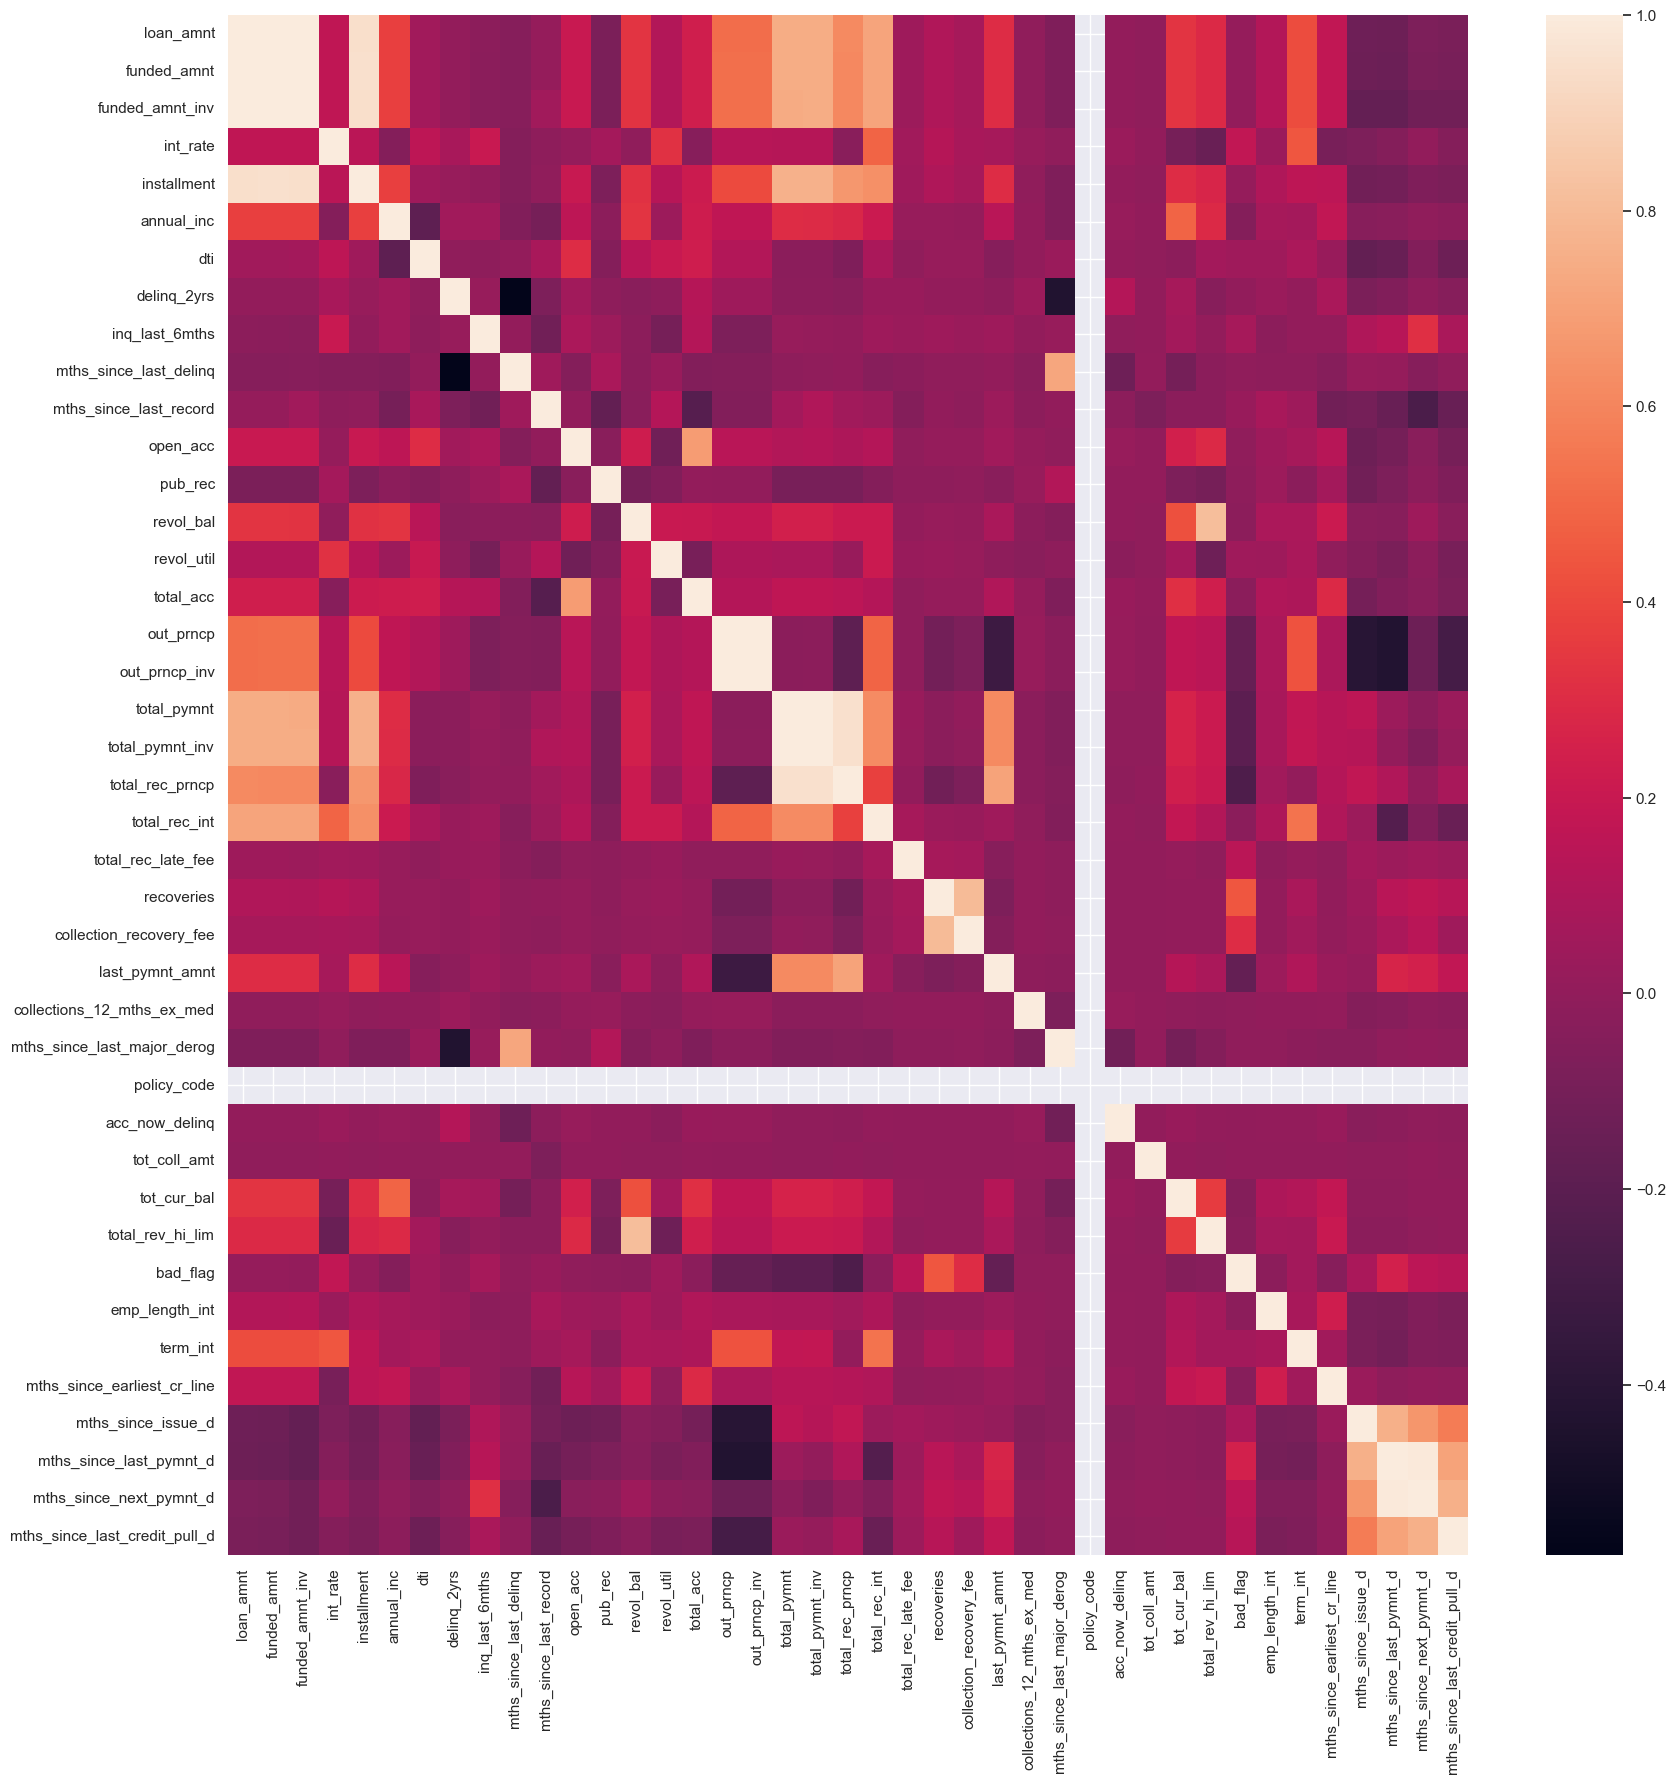

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [42]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18524\1624107534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18524\1624107534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [44]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [45]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [46]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [47]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [48]:
data.drop(['policy_code'], axis=1, inplace=True)

In [49]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [50]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [51]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Di sini, kolom-kolom dengan missing values di atas 75% dibuang

In [52]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Values Filling

In [53]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [54]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [55]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [56]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [57]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [58]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [59]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [60]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELING

### Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

### SMOTE Oversampling

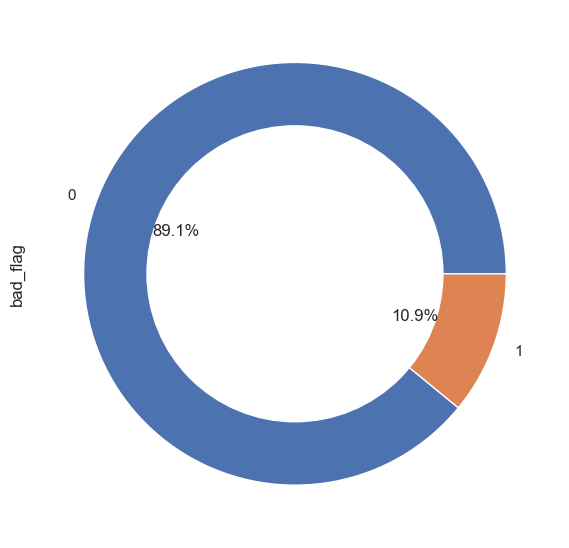

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [65]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X_train,y_train=over.fit_resample(X_train, y_train)

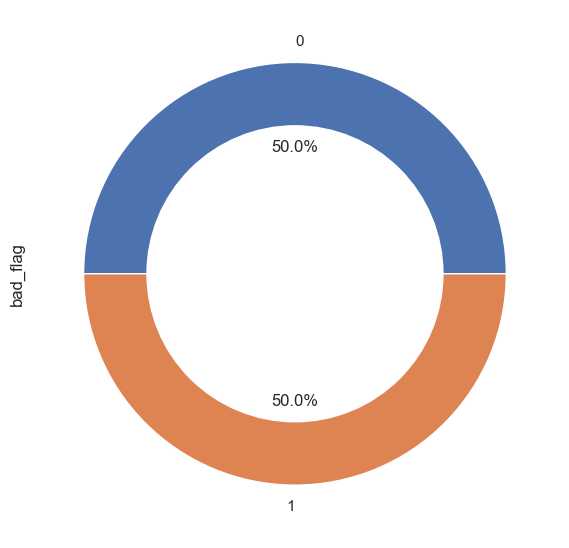

In [66]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

### Training

In [67]:
X_train = np.array(X_train).T
y_train = np.array(y_train).reshape((1, len(y_train)))

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [68]:
def sigmoid(z):
    ### START CODE HERE ### (~ 1 line of code)
    res = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return res

In [69]:
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


In [70]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (~ 3 lines of code)
    # Size of input layer.
    n_x = X.shape[0]
    # Size of hidden layer.
    n_h = 2
    # Size of output layer.
    n_y = Y.shape[0] 
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [71]:
(n_x, n_h, n_y) = layer_sizes(X_train, y_train)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 99
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


In [72]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [73]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.60879209e-03 -2.22114160e-02  2.08009435e-03  1.16182522e-02
   3.43506002e-03  1.26321110e-02 -8.85680932e-03 -4.00781166e-03
   7.66065091e-03  4.74050542e-04  6.57899825e-03  1.51694515e-02
   4.28078672e-03  3.97683430e-04  2.93758959e-02  5.40176539e-03
  -5.36942936e-03 -1.61640062e-02  1.70946955e-02 -1.12136813e-02
   5.23742626e-03  3.75389754e-03  8.26536604e-03  9.61605569e-03
  -9.13952629e-03 -1.82283990e-02 -2.32034784e-03  8.08145189e-03
   1.00450421e-02  8.40944041e-04  4.71612449e-03 -3.90788401e-03
  -1.88323148e-03  1.07530946e-03 -1.09994246e-02  3.10704462e-03
  -1.61276740e-02 -2.16112385e-02  6.89593075e-03  9.03359434e-03
  -1.88962649e-02 -9.41846170e-03  2.94849293e-03 -2.80361186e-03
  -6.82897791e-03  6.13067254e-03  2.95409230e-03 -7.52203757e-03
   2.56520260e-03 -1.36455699e-03 -1.00312750e-02  1.09485034e-02
   2.30681616e-03 -5.26899041e-03  9.32933539e-05  1.54733149e-02
  -1.99375468e-02 -5.51148281e-03 -1.74721901e-03  1.30116011e-02
  -1.

In [74]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- python dictionary containing Z1, A1, Z2, A2 
    (that simplifies the calculations in the back propagation step)
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement forward propagation to calculate A2.
    ### START CODE HERE ### (~ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [79]:
A2, cache = forward_propagation(X_train, parameters)

print(A2)

[[0.49990498 0.49993273 0.49990411 ... 0.49996356 0.49992145 0.49989516]]


In [80]:
def compute_cost(A2, Y):
    """
    Computes the cost function as a log loss
    
    Arguments:
    A2 -- The output of the neural network of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- log loss
    
    """
    # Number of examples.
    m = Y.shape[1]
    
    ### START CODE HERE ### (~ 2 lines of code)
    logloss = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = np.squeeze(logloss)
    ### END CODE HERE ###

    assert(isinstance(cost, float))
    
    return cost

In [81]:
print("cost = " + str(compute_cost(A2, y_train)))

cost = 0.6931544092707944


In [83]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate partial derivatives denoted as dW1, db1, dW2, db2 for simplicity. 
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X_train, y_train)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[ 6.20120594e-05  1.53269795e-05 -1.17506633e-05 -1.30833691e-05
  -7.67290312e-06 -3.79104543e-07  6.47804218e-05  4.16320331e-08
   1.08445645e-07  2.61864232e-05 -1.15273058e-05  5.76235045e-05
   1.47026623e-05  5.67618886e-05  1.40487137e-05  1.81311608e-07
   2.02531382e-05  1.84369092e-06  8.51926227e-06  3.60995422e-06
   1.94630400e-06  1.10655676e-05  3.01518656e-07  2.42771456e-06
   2.08736319e-06  1.97670649e-06  4.85076151e-06  3.05263141e-06
   8.71230174e-06  2.74772015e-05  8.87225476e-06  6.62605661e-06
   1.45306274e-06  1.23006871e-06  1.77077286e-05  1.24031679e-05
   2.13935008e-06  1.04030469e-08  1.48625934e-08  1.54484543e-05
   5.57118766e-06  3.92539563e-06  3.91313159e-06  4.62900015e-06
   9.00631249e-06  9.03820559e-06  2.95962787e-09  9.30172213e-06
   6.93924456e-06  6.23839183e-06  1.19588515e-06  1.28337044e-06
   9.93126933e-06 -4.42679632e-09  2.25699392e-06  1.36618379e-05
   2.27433841e-06  4.90874576e-06  2.20799356e-05  1.19168277e-05
   3

In [84]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients
    learning_rate -- learning rate for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads".
    ### START CODE HERE ### (~ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ### END CODE HERE ###
    
    # Update rule for each parameter.
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [85]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[ 1.53437762e-03 -2.22298084e-02  2.09419514e-03  1.16339523e-02
   3.44426750e-03  1.26325659e-02 -8.93454582e-03 -4.00786161e-03
   7.66052077e-03  4.42626834e-04  6.59283102e-03  1.51003033e-02
   4.26314353e-03  3.29569164e-04  2.93590375e-02  5.40154781e-03
  -5.39373313e-03 -1.61662186e-02  1.70844724e-02 -1.12180133e-02
   5.23509070e-03  3.74061886e-03  8.26500422e-03  9.61314243e-03
  -9.14203112e-03 -1.82307711e-02 -2.32616876e-03  8.07778874e-03
   1.00345874e-02  8.07971399e-04  4.70547778e-03 -3.91583528e-03
  -1.88497516e-03  1.07383337e-03 -1.10206739e-02  3.09216082e-03
  -1.61302412e-02 -2.16112509e-02  6.89591291e-03  9.01505619e-03
  -1.89029503e-02 -9.42317218e-03  2.94379717e-03 -2.80916666e-03
  -6.83978549e-03  6.11982669e-03  2.95408875e-03 -7.53319963e-03
   2.55687551e-03 -1.37204306e-03 -1.00327100e-02  1.09469634e-02
   2.29489864e-03 -5.26898509e-03  9.05849612e-05  1.54569207e-02
  -1.99402760e-02 -5.51737331e-03 -1.77371493e-03  1.29973009e-

In [86]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters.
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop.
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [87]:
parameters = nn_model(X_train, y_train, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

Cost after iteration 0: 0.693152
Cost after iteration 1: 0.693145
Cost after iteration 2: 0.693139
Cost after iteration 3: 0.693134
Cost after iteration 4: 0.693127
Cost after iteration 5: 0.693120
Cost after iteration 6: 0.693112
Cost after iteration 7: 0.693102
Cost after iteration 8: 0.693089
Cost after iteration 9: 0.693075
Cost after iteration 10: 0.693056
Cost after iteration 11: 0.693033
Cost after iteration 12: 0.693005
Cost after iteration 13: 0.692971
Cost after iteration 14: 0.692928
Cost after iteration 15: 0.692875
Cost after iteration 16: 0.692809
Cost after iteration 17: 0.692727
Cost after iteration 18: 0.692627
Cost after iteration 19: 0.692503
Cost after iteration 20: 0.692350
Cost after iteration 21: 0.692162
Cost after iteration 22: 0.691932
Cost after iteration 23: 0.691650
Cost after iteration 24: 0.691307
Cost after iteration 25: 0.690891
Cost after iteration 26: 0.690388
Cost after iteration 27: 0.689782
Cost after iteration 28: 0.689058
Cost after iteration 29:

Cost after iteration 238: 0.364429
Cost after iteration 239: 0.363709
Cost after iteration 240: 0.362989
Cost after iteration 241: 0.362271
Cost after iteration 242: 0.361553
Cost after iteration 243: 0.360835
Cost after iteration 244: 0.360119
Cost after iteration 245: 0.359403
Cost after iteration 246: 0.358689
Cost after iteration 247: 0.357975
Cost after iteration 248: 0.357263
Cost after iteration 249: 0.356551
Cost after iteration 250: 0.355841
Cost after iteration 251: 0.355132
Cost after iteration 252: 0.354425
Cost after iteration 253: 0.353718
Cost after iteration 254: 0.353014
Cost after iteration 255: 0.352310
Cost after iteration 256: 0.351608
Cost after iteration 257: 0.350908
Cost after iteration 258: 0.350209
Cost after iteration 259: 0.349512
Cost after iteration 260: 0.348816
Cost after iteration 261: 0.348122
Cost after iteration 262: 0.347430
Cost after iteration 263: 0.346739
Cost after iteration 264: 0.346050
Cost after iteration 265: 0.345363
Cost after iteration

Cost after iteration 473: 0.250876
Cost after iteration 474: 0.250612
Cost after iteration 475: 0.250350
Cost after iteration 476: 0.250089
Cost after iteration 477: 0.249830
Cost after iteration 478: 0.249571
Cost after iteration 479: 0.249314
Cost after iteration 480: 0.249058
Cost after iteration 481: 0.248803
Cost after iteration 482: 0.248550
Cost after iteration 483: 0.248297
Cost after iteration 484: 0.248046
Cost after iteration 485: 0.247796
Cost after iteration 486: 0.247547
Cost after iteration 487: 0.247299
Cost after iteration 488: 0.247053
Cost after iteration 489: 0.246807
Cost after iteration 490: 0.246563
Cost after iteration 491: 0.246320
Cost after iteration 492: 0.246077
Cost after iteration 493: 0.245837
Cost after iteration 494: 0.245597
Cost after iteration 495: 0.245358
Cost after iteration 496: 0.245120
Cost after iteration 497: 0.244884
Cost after iteration 498: 0.244648
Cost after iteration 499: 0.244414
Cost after iteration 500: 0.244181
Cost after iteration

Cost after iteration 708: 0.212349
Cost after iteration 709: 0.212253
Cost after iteration 710: 0.212156
Cost after iteration 711: 0.212060
Cost after iteration 712: 0.211964
Cost after iteration 713: 0.211869
Cost after iteration 714: 0.211774
Cost after iteration 715: 0.211679
Cost after iteration 716: 0.211585
Cost after iteration 717: 0.211491
Cost after iteration 718: 0.211398
Cost after iteration 719: 0.211305
Cost after iteration 720: 0.211212
Cost after iteration 721: 0.211119
Cost after iteration 722: 0.211027
Cost after iteration 723: 0.210936
Cost after iteration 724: 0.210844
Cost after iteration 725: 0.210753
Cost after iteration 726: 0.210662
Cost after iteration 727: 0.210572
Cost after iteration 728: 0.210482
Cost after iteration 729: 0.210392
Cost after iteration 730: 0.210303
Cost after iteration 731: 0.210214
Cost after iteration 732: 0.210125
Cost after iteration 733: 0.210037
Cost after iteration 734: 0.209949
Cost after iteration 735: 0.209861
Cost after iteration

Cost after iteration 943: 0.196990
Cost after iteration 944: 0.196947
Cost after iteration 945: 0.196905
Cost after iteration 946: 0.196862
Cost after iteration 947: 0.196820
Cost after iteration 948: 0.196778
Cost after iteration 949: 0.196736
Cost after iteration 950: 0.196694
Cost after iteration 951: 0.196652
Cost after iteration 952: 0.196610
Cost after iteration 953: 0.196569
Cost after iteration 954: 0.196528
Cost after iteration 955: 0.196486
Cost after iteration 956: 0.196445
Cost after iteration 957: 0.196404
Cost after iteration 958: 0.196363
Cost after iteration 959: 0.196323
Cost after iteration 960: 0.196282
Cost after iteration 961: 0.196242
Cost after iteration 962: 0.196201
Cost after iteration 963: 0.196161
Cost after iteration 964: 0.196121
Cost after iteration 965: 0.196081
Cost after iteration 966: 0.196041
Cost after iteration 967: 0.196001
Cost after iteration 968: 0.195962
Cost after iteration 969: 0.195922
Cost after iteration 970: 0.195883
Cost after iteration

Cost after iteration 1173: 0.189883
Cost after iteration 1174: 0.189861
Cost after iteration 1175: 0.189839
Cost after iteration 1176: 0.189817
Cost after iteration 1177: 0.189795
Cost after iteration 1178: 0.189774
Cost after iteration 1179: 0.189752
Cost after iteration 1180: 0.189730
Cost after iteration 1181: 0.189709
Cost after iteration 1182: 0.189688
Cost after iteration 1183: 0.189666
Cost after iteration 1184: 0.189645
Cost after iteration 1185: 0.189624
Cost after iteration 1186: 0.189602
Cost after iteration 1187: 0.189581
Cost after iteration 1188: 0.189560
Cost after iteration 1189: 0.189539
Cost after iteration 1190: 0.189518
Cost after iteration 1191: 0.189497
Cost after iteration 1192: 0.189476
Cost after iteration 1193: 0.189455
Cost after iteration 1194: 0.189435
Cost after iteration 1195: 0.189414
Cost after iteration 1196: 0.189393
Cost after iteration 1197: 0.189373
Cost after iteration 1198: 0.189352
Cost after iteration 1199: 0.189331
Cost after iteration 1200: 0

Cost after iteration 1401: 0.186078
Cost after iteration 1402: 0.186066
Cost after iteration 1403: 0.186053
Cost after iteration 1404: 0.186041
Cost after iteration 1405: 0.186028
Cost after iteration 1406: 0.186016
Cost after iteration 1407: 0.186003
Cost after iteration 1408: 0.185991
Cost after iteration 1409: 0.185978
Cost after iteration 1410: 0.185966
Cost after iteration 1411: 0.185954
Cost after iteration 1412: 0.185941
Cost after iteration 1413: 0.185929
Cost after iteration 1414: 0.185917
Cost after iteration 1415: 0.185905
Cost after iteration 1416: 0.185893
Cost after iteration 1417: 0.185880
Cost after iteration 1418: 0.185868
Cost after iteration 1419: 0.185856
Cost after iteration 1420: 0.185844
Cost after iteration 1421: 0.185832
Cost after iteration 1422: 0.185820
Cost after iteration 1423: 0.185808
Cost after iteration 1424: 0.185796
Cost after iteration 1425: 0.185784
Cost after iteration 1426: 0.185772
Cost after iteration 1427: 0.185760
Cost after iteration 1428: 0

Cost after iteration 1629: 0.191409
Cost after iteration 1630: 0.194903
Cost after iteration 1631: 0.191318
Cost after iteration 1632: 0.194754
Cost after iteration 1633: 0.191229
Cost after iteration 1634: 0.194610
Cost after iteration 1635: 0.191142
Cost after iteration 1636: 0.194470
Cost after iteration 1637: 0.191057
Cost after iteration 1638: 0.194334
Cost after iteration 1639: 0.190974
Cost after iteration 1640: 0.194201
Cost after iteration 1641: 0.190893
Cost after iteration 1642: 0.194072
Cost after iteration 1643: 0.190814
Cost after iteration 1644: 0.193947
Cost after iteration 1645: 0.190737
Cost after iteration 1646: 0.193825
Cost after iteration 1647: 0.190661
Cost after iteration 1648: 0.193706
Cost after iteration 1649: 0.190588
Cost after iteration 1650: 0.193591
Cost after iteration 1651: 0.190516
Cost after iteration 1652: 0.193479
Cost after iteration 1653: 0.190446
Cost after iteration 1654: 0.193370
Cost after iteration 1655: 0.190377
Cost after iteration 1656: 0

Cost after iteration 1857: 0.187257
Cost after iteration 1858: 0.189044
Cost after iteration 1859: 0.187240
Cost after iteration 1860: 0.189023
Cost after iteration 1861: 0.187222
Cost after iteration 1862: 0.189002
Cost after iteration 1863: 0.187205
Cost after iteration 1864: 0.188982
Cost after iteration 1865: 0.187188
Cost after iteration 1866: 0.188961
Cost after iteration 1867: 0.187170
Cost after iteration 1868: 0.188941
Cost after iteration 1869: 0.187153
Cost after iteration 1870: 0.188921
Cost after iteration 1871: 0.187136
Cost after iteration 1872: 0.188901
Cost after iteration 1873: 0.187120
Cost after iteration 1874: 0.188881
Cost after iteration 1875: 0.187103
Cost after iteration 1876: 0.188861
Cost after iteration 1877: 0.187086
Cost after iteration 1878: 0.188842
Cost after iteration 1879: 0.187069
Cost after iteration 1880: 0.188822
Cost after iteration 1881: 0.187053
Cost after iteration 1882: 0.188803
Cost after iteration 1883: 0.187036
Cost after iteration 1884: 0

Cost after iteration 2085: 0.185688
Cost after iteration 2086: 0.187266
Cost after iteration 2087: 0.185677
Cost after iteration 2088: 0.187254
Cost after iteration 2089: 0.185666
Cost after iteration 2090: 0.187243
Cost after iteration 2091: 0.185655
Cost after iteration 2092: 0.187231
Cost after iteration 2093: 0.185644
Cost after iteration 2094: 0.187220
Cost after iteration 2095: 0.185634
Cost after iteration 2096: 0.187209
Cost after iteration 2097: 0.185623
Cost after iteration 2098: 0.187197
Cost after iteration 2099: 0.185612
Cost after iteration 2100: 0.187186
Cost after iteration 2101: 0.185602
Cost after iteration 2102: 0.187175
Cost after iteration 2103: 0.185591
Cost after iteration 2104: 0.187164
Cost after iteration 2105: 0.185581
Cost after iteration 2106: 0.187153
Cost after iteration 2107: 0.185570
Cost after iteration 2108: 0.187142
Cost after iteration 2109: 0.185560
Cost after iteration 2110: 0.187131
Cost after iteration 2111: 0.185549
Cost after iteration 2112: 0

Cost after iteration 2313: 0.184440
Cost after iteration 2314: 0.185875
Cost after iteration 2315: 0.184428
Cost after iteration 2316: 0.185860
Cost after iteration 2317: 0.184416
Cost after iteration 2318: 0.185846
Cost after iteration 2319: 0.184404
Cost after iteration 2320: 0.185832
Cost after iteration 2321: 0.184392
Cost after iteration 2322: 0.185818
Cost after iteration 2323: 0.184380
Cost after iteration 2324: 0.185803
Cost after iteration 2325: 0.184368
Cost after iteration 2326: 0.185789
Cost after iteration 2327: 0.184356
Cost after iteration 2328: 0.185775
Cost after iteration 2329: 0.184344
Cost after iteration 2330: 0.185760
Cost after iteration 2331: 0.184332
Cost after iteration 2332: 0.185746
Cost after iteration 2333: 0.184320
Cost after iteration 2334: 0.185732
Cost after iteration 2335: 0.184309
Cost after iteration 2336: 0.185717
Cost after iteration 2337: 0.184297
Cost after iteration 2338: 0.185703
Cost after iteration 2339: 0.184285
Cost after iteration 2340: 0

Cost after iteration 2541: 0.182984
Cost after iteration 2542: 0.184063
Cost after iteration 2543: 0.182970
Cost after iteration 2544: 0.184045
Cost after iteration 2545: 0.182956
Cost after iteration 2546: 0.184026
Cost after iteration 2547: 0.182941
Cost after iteration 2548: 0.184008
Cost after iteration 2549: 0.182927
Cost after iteration 2550: 0.183989
Cost after iteration 2551: 0.182913
Cost after iteration 2552: 0.183971
Cost after iteration 2553: 0.182898
Cost after iteration 2554: 0.183952
Cost after iteration 2555: 0.182884
Cost after iteration 2556: 0.183933
Cost after iteration 2557: 0.182869
Cost after iteration 2558: 0.183915
Cost after iteration 2559: 0.182855
Cost after iteration 2560: 0.183896
Cost after iteration 2561: 0.182840
Cost after iteration 2562: 0.183877
Cost after iteration 2563: 0.182826
Cost after iteration 2564: 0.183858
Cost after iteration 2565: 0.182811
Cost after iteration 2566: 0.183839
Cost after iteration 2567: 0.182797
Cost after iteration 2568: 0

Cost after iteration 2769: 0.181281
Cost after iteration 2770: 0.181867
Cost after iteration 2771: 0.181267
Cost after iteration 2772: 0.181848
Cost after iteration 2773: 0.181252
Cost after iteration 2774: 0.181830
Cost after iteration 2775: 0.181238
Cost after iteration 2776: 0.181812
Cost after iteration 2777: 0.181223
Cost after iteration 2778: 0.181793
Cost after iteration 2779: 0.181209
Cost after iteration 2780: 0.181775
Cost after iteration 2781: 0.181194
Cost after iteration 2782: 0.181757
Cost after iteration 2783: 0.181180
Cost after iteration 2784: 0.181738
Cost after iteration 2785: 0.181165
Cost after iteration 2786: 0.181720
Cost after iteration 2787: 0.181151
Cost after iteration 2788: 0.181702
Cost after iteration 2789: 0.181137
Cost after iteration 2790: 0.181684
Cost after iteration 2791: 0.181122
Cost after iteration 2792: 0.181666
Cost after iteration 2793: 0.181108
Cost after iteration 2794: 0.181648
Cost after iteration 2795: 0.181094
Cost after iteration 2796: 0

Cost after iteration 2997: 0.179833
Cost after iteration 2998: 0.180092
Cost after iteration 2999: 0.179823
W1 = [[ 3.16437396e-01  4.26601920e-01  7.76683038e-01  9.82920162e-01
   1.17087788e+00  1.26012904e+00  1.18946932e+00  2.68407965e-01
   5.15868897e-01  1.37789153e+00  1.12099537e+00  2.20223689e-01
   2.40672042e-01  5.99741017e-01  5.48661150e-01  3.57112569e-01
   7.40142859e-01  7.75137544e-01  7.83880317e-01  7.05554562e-01
   6.94642247e-01  7.62407732e-01  5.03512826e-01  6.81165740e-01
   7.68863772e-01  8.14924773e-01  1.30884244e+00  1.30849690e+00
   1.33875522e+00  1.15949062e+00  1.38507759e+00  1.35685269e+00
   1.37407533e+00  1.31214322e+00  1.29335801e+00  1.35242064e+00
   1.41803862e+00  6.03185449e-02  7.57048997e-02  1.34094628e+00
   1.31564637e+00  1.42237407e+00  1.32452278e+00  1.35302580e+00
   1.36605387e+00  1.36168180e+00  1.73871751e-02  1.33322322e+00
   1.29054754e+00  1.32970101e+00  1.23888995e+00  1.32013757e+00
   1.34508478e+00 -7.15946773

In [88]:
# GRADED FUNCTION: predict

def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (blue: 0 / red: 1)
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [92]:
X_test = np.array(X_test).T

In [95]:
y_test = np.array(y_test).reshape((1, len(y_test)))

In [93]:
Y_pred = predict(X_test, parameters)

print(f"Predictions:\n{Y_pred}")

Predictions:
[[False False False ...  True False False]]


In [102]:
# Print the overall correct predictions, total predictions, and the percentage of correct predictions
# print(f"{full_percentage_a}/{full_percentage_b} or {full_percentage_a/full_percentage_b}")

Y_pred[0]

array([False, False, False, ...,  True, False, False])

In [104]:
y_test[0]

array([0, 0, 0, ..., 1, 0, 0])

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test[0], Y_pred[0])
print(cm)
accuracy_score(y_test[0], Y_pred[0])

[[82147   920]
 [ 5412  4778]]


0.932101611675263